In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [64]:
ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


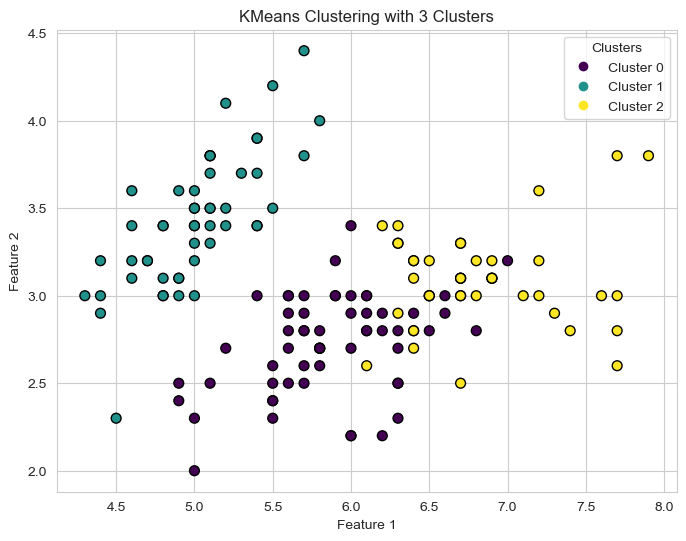

In [65]:
from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

X = ds.data
labels = kmeans.fit_predict(X)

# Scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(3)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

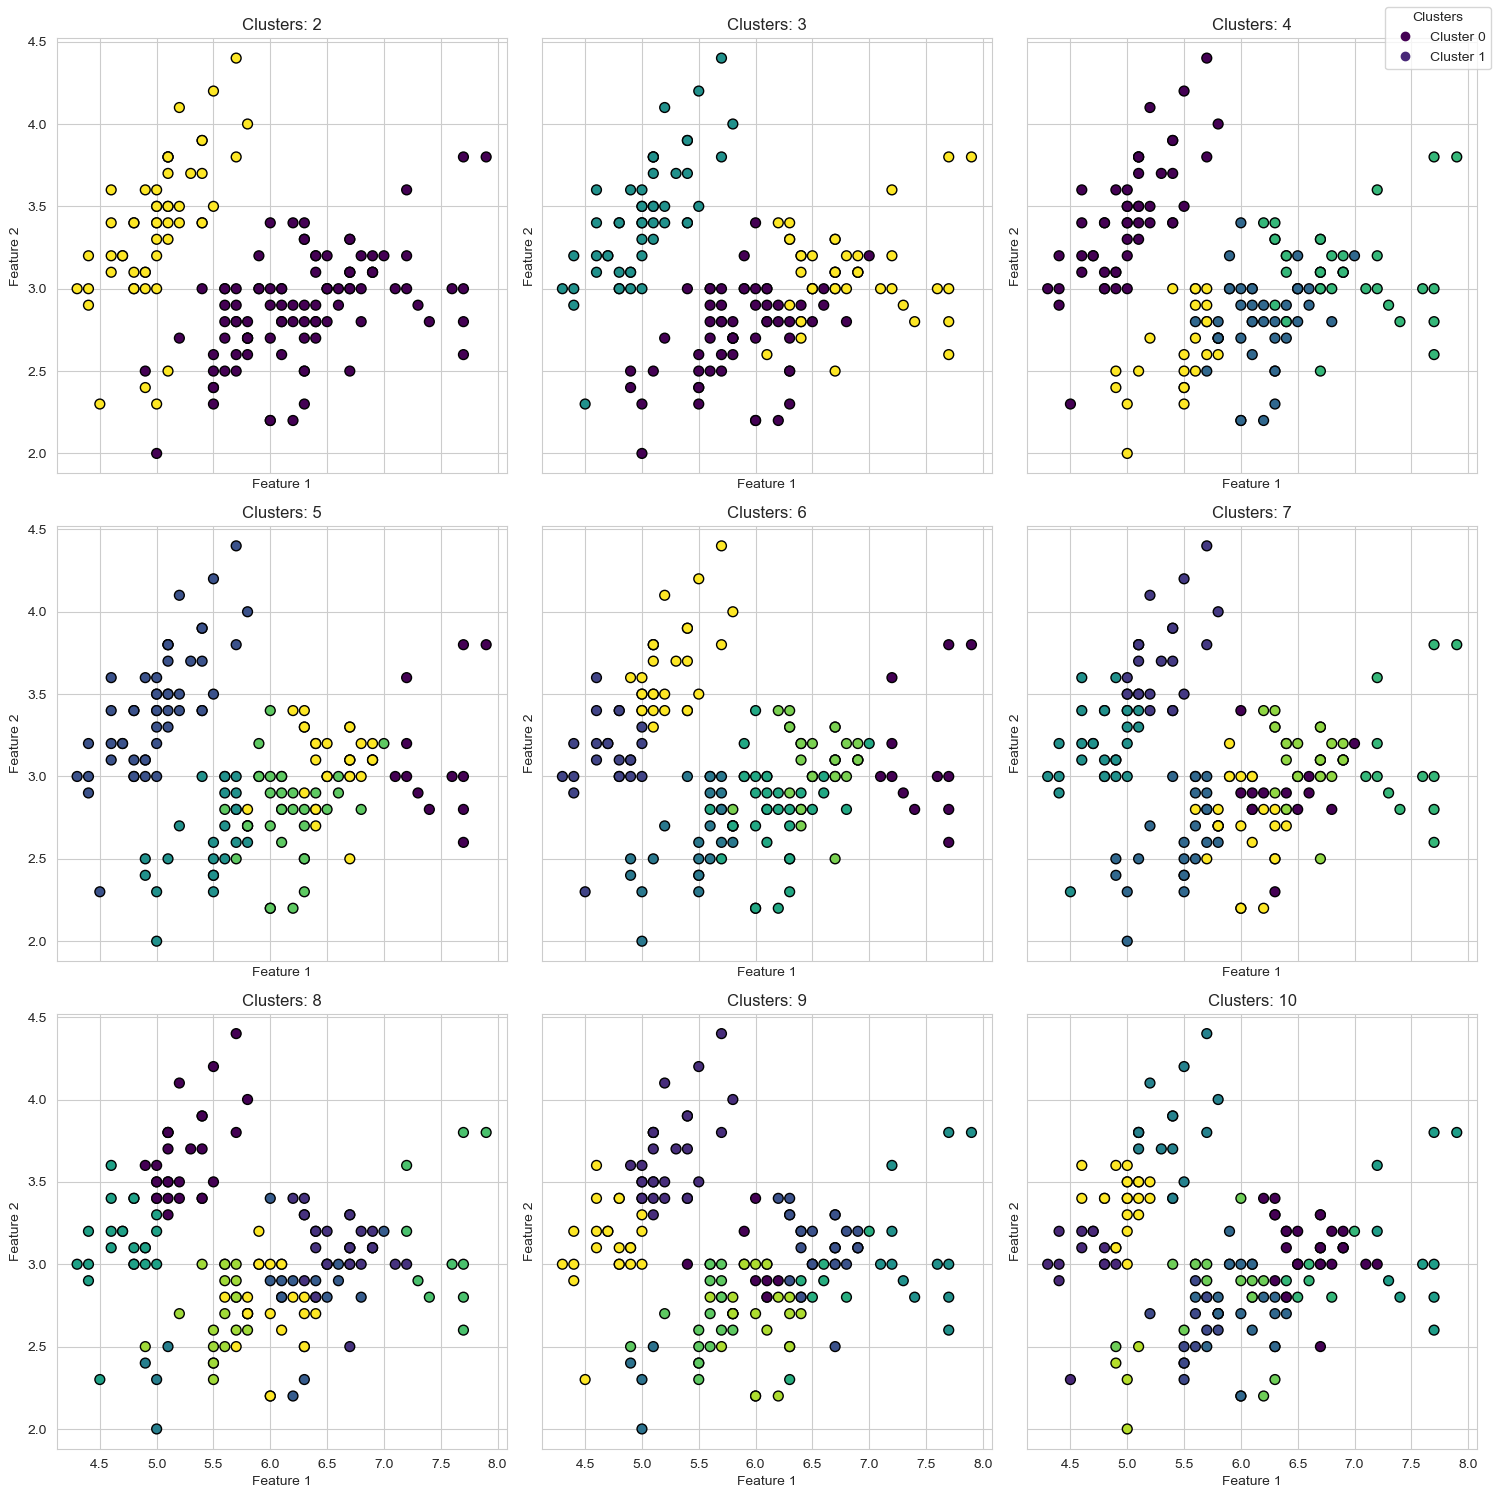

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Load the Iris dataset
X = ds.data

# Define the pipeline with KMeans clustering
pipeline = Pipeline([
    ('kmeans', KMeans(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'kmeans__n_clusters': np.arange(2, 11),
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X)

# Extract the results of the grid search
results = grid_search.cv_results_

# Plotting the results
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex='all', sharey='all')

for i, (n_clusters, ax) in enumerate(zip(results['param_kmeans__n_clusters'], axs.flatten())):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    ax.set_title(f'Clusters: {n_clusters}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Add a common legend
legend_labels = [f'Cluster {i}' for i in range(results['param_kmeans__n_clusters'][0])]
fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Ruslan\AppData\Local\Temp\ipykernel_17940\2767790875.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')


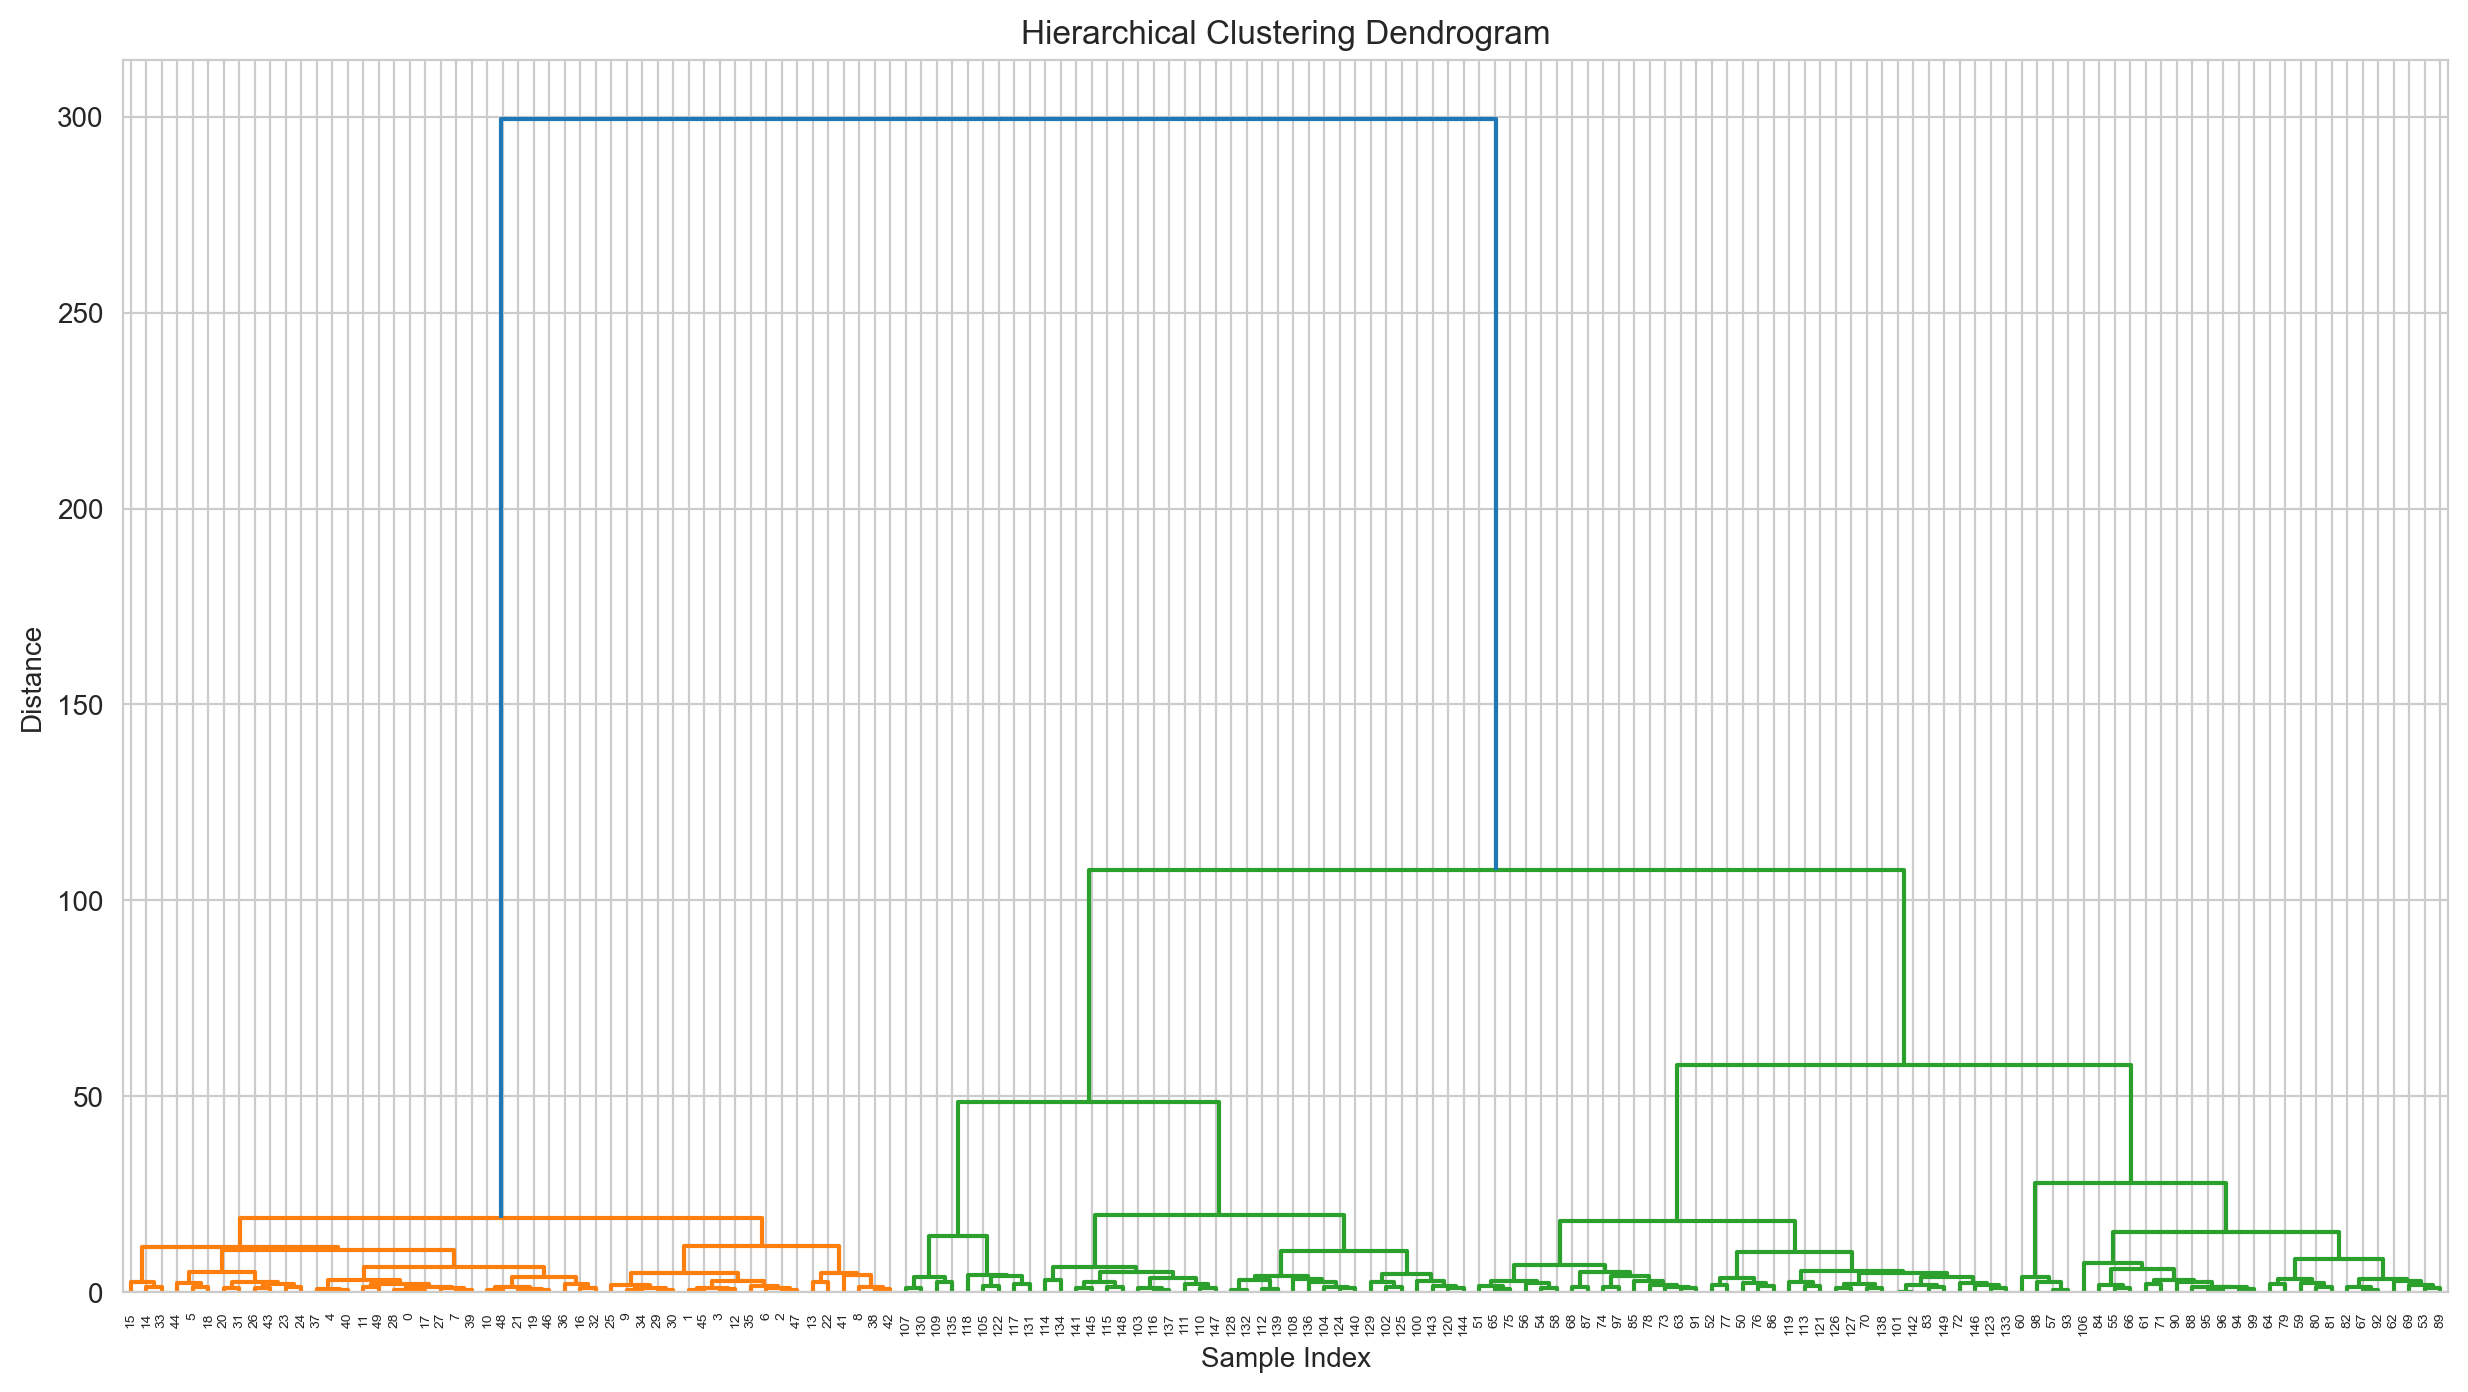

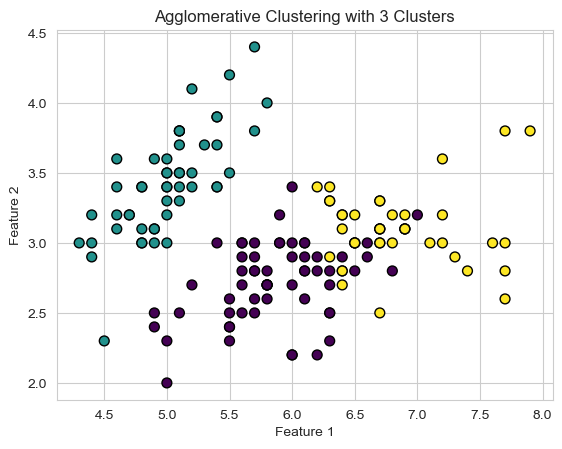

In [67]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# Fit AgglomerativeClustering model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = model.fit_predict(X)

# Visualize the dendrogram (optional)
# Calculate pairwise distances for the dendrogram
distances = pairwise_distances(X)
linkage_matrix = linkage(distances, method='ward')

# Set a larger figure size and higher resolution
plt.figure(figsize=(15, 8), dpi=200)

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering with 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

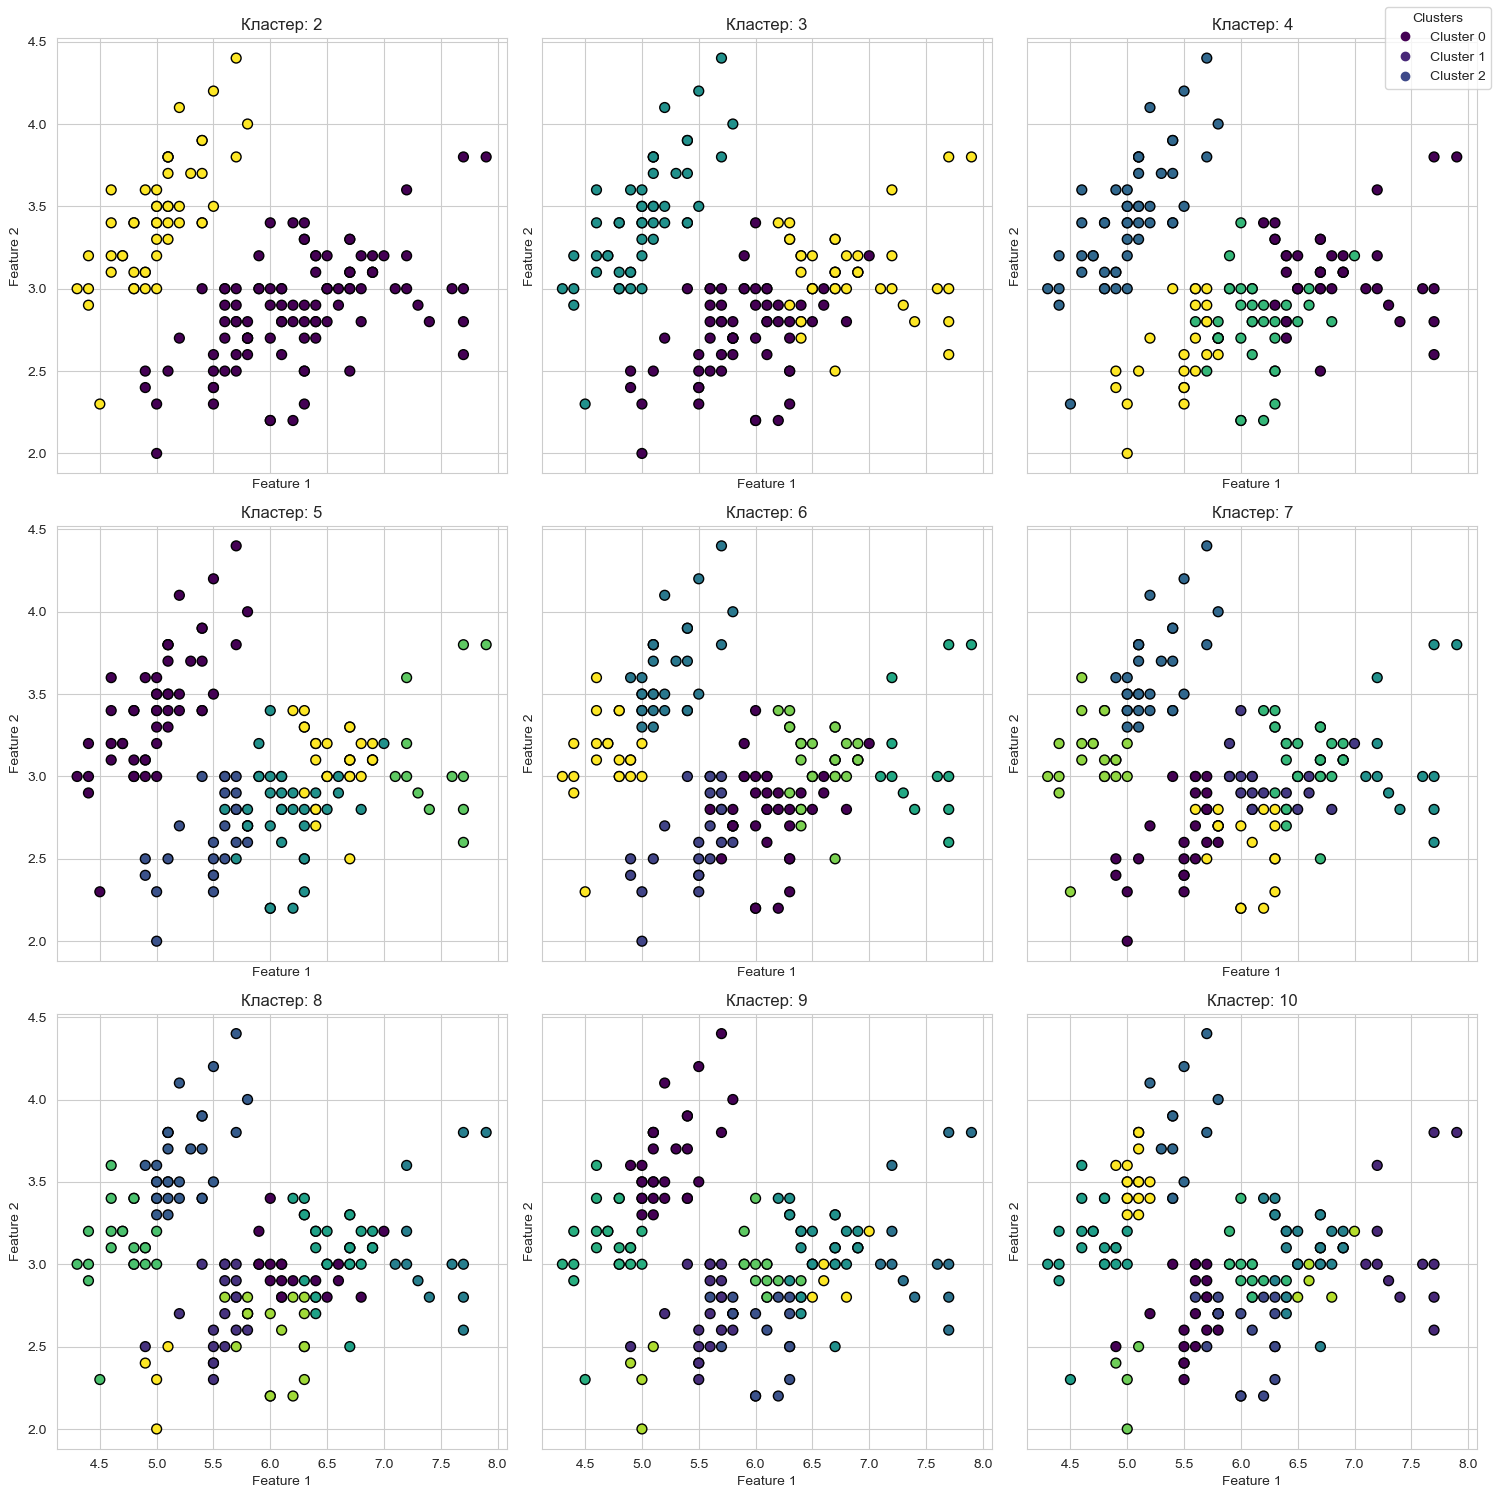

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

# Load the Iris dataset
X = ds.data

# Plotting the results
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex='all', sharey='all')

for n_clusters, ax in zip(range(2, 11), axs.flatten()):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    ax.set_title(f'Кластер: {n_clusters}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Add a common legend
legend_labels = [f'Cluster {i}' for i in range(3)]  # Adjust the range accordingly
fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', loc='upper right')

plt.tight_layout()
plt.show()


C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

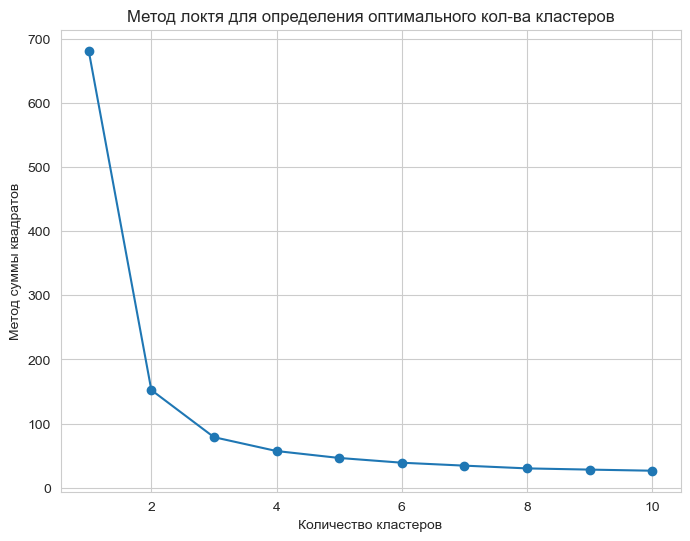

In [69]:
k_values = range(1, 11)
inertia_values = [KMeans(n_clusters=k, random_state=42).fit(ds.data).inertia_ for k in k_values]

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Метод локтя для определения оптимального кол-ва кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Метод суммы квадратов')
plt.show()

C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


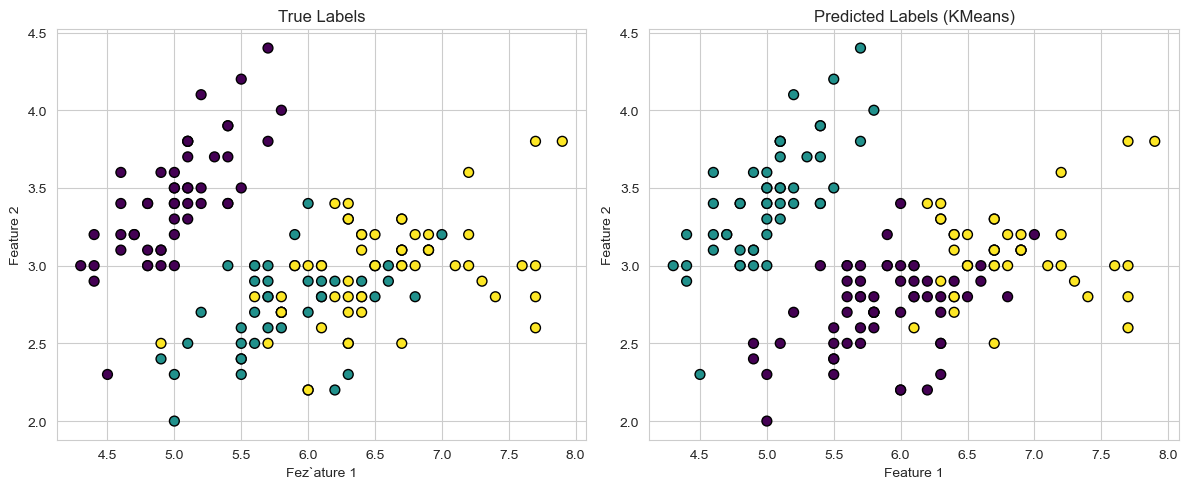

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Assuming ds is a dataset object
X = ds.data
true_labels = ds.target  # Assuming ds has target values

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Plot true labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('True Labels')
plt.xlabel('Fez`ature 1')
plt.ylabel('Feature 2')

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Predicted Labels (KMeans)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

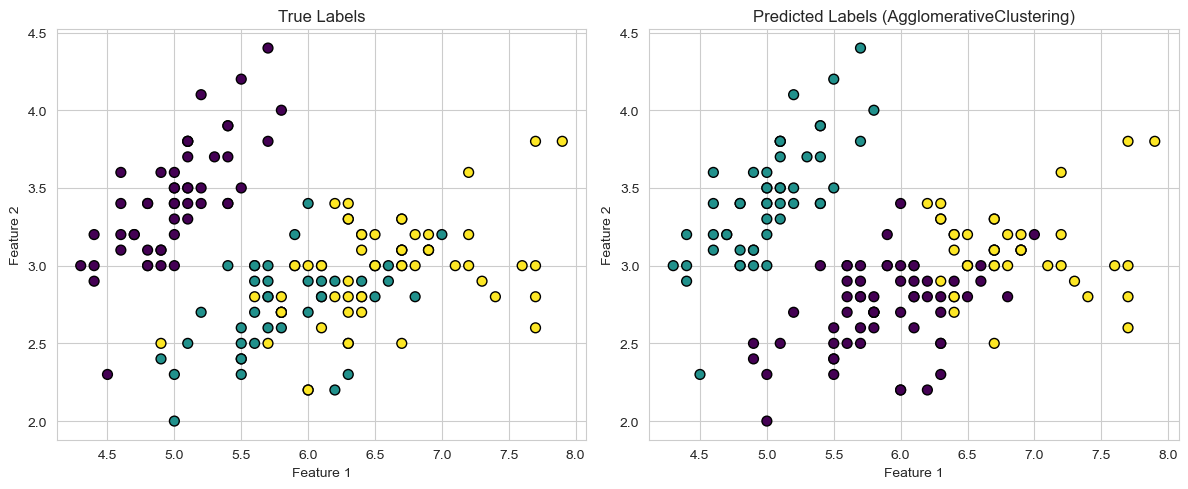

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

# Assuming ds is a dataset object
X = ds.data
true_labels = ds.target  # Assuming ds has target values

# Fit AgglomerativeClustering with 3 clusters
agglomerative = AgglomerativeClustering(n_clusters=3)
predicted_labels = agglomerative.fit_predict(X)

# Plot true labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Predicted Labels (AgglomerativeClustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()